In [1]:
#USING AGES------------------

In [1325]:
import os
import pandas as  pd
import numpy as np
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline
import imblearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.io import imread, imshow
from sklearn import metrics
from PIL import Image, ImageFilter



from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 


# --------------IMAGE READING---------------------------------

### READING TRAIN IMAGE DATA INTO LIST

In [1096]:
#categories of images
category=["angry","happy","neutral","sad"]

In [1299]:
#list to store the images name
train_angry_img=[]
train_happy_img=[]
train_neutral_img=[]
train_sad_img=[]



In [1300]:
#storing images name
path_train=r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\Train"
for i in os.listdir(path_train):
    a=os.path.join(path_train,i)
    for j in os.listdir(a):
        k=os.path.join(path_train,i,j)
        if(i=="angry"):
            train_angry_img.append(k)
        elif(i=="happy"):
            train_happy_img.append(k)
        elif(i=="neutral"):
            train_neutral_img.append(k)
        elif(i=="sad"):
            train_sad_img.append(k)
                    
            
      

In [1301]:
#storing all images to single list
train_images=[
    train_angry_img[1:],
train_happy_img[1:],
train_neutral_img[1:],
train_sad_img[1:]]

In [1302]:
for i in train_images:
    print(len(i))

410
594
398
407


In [194]:
#converting all train images into pixel_matrix

In [223]:
408+594+398+407

1807

### Function to get the images into a given ratio

In [1304]:
def Train_Array(l,b):
    

    train_p_angry=[]
    train_p_happy=[]
    train_p_neutral=[]
    train_p_sad=[]
    
    count=0
    
    
    for i in train_angry_img[1:]:
        
        if(count==407):
            break
        if i!=None:
            image = Image.open(i)
            image = image.convert("L")
            image = image.filter(ImageFilter.FIND_EDGES)
            img=(np.array(image))
            img=cv2.resize(img,(l,b))
            img=img.reshape(1,l*b)
            train_p_angry.append(img)
            
            a=np.array(image)
            img_arr=(cv2.resize(a,(60,60)))
            flip=(cv2.flip(img_arr,1)).reshape(1,3600)
            train_p_angry.append(flip)
            
            
            
        count+=1   
       
    count=0
    for i in train_happy_img[1:]:
        if count==593:
            break
        if i!=None:
            image = Image.open(i)
            image = image.convert("L")
            image = image.filter(ImageFilter.FIND_EDGES)
            img=(np.array(image))
            img=cv2.resize(img,(l,b))
            img=img.reshape(1,l*b)
            train_p_happy.append(img)
            a=np.array(image)
            img_arr=(cv2.resize(a,(60,60)))
            flip=(cv2.flip(img_arr,1)).reshape(1,3600)
            train_p_happy.append(flip)
            
           
            
        count+=1 
    
        
        
    count=0       
    for i in train_neutral_img[1:]:
        if count==397:
            break
        if i!=None:
            image = Image.open(i)
            image = image.convert("L")
            image = image.filter(ImageFilter.FIND_EDGES)
            img=(np.array(image))
            img=cv2.resize(img,(l,b))
            img=img.reshape(1,l*b)
            train_p_neutral.append(img)
            a=np.array(image)
            img_arr=(cv2.resize(a,(60,60)))
            flip=(cv2.flip(img_arr,1)).reshape(1,3600)
            train_p_neutral.append(flip)
            
           
        count+=1   
    
    
    count=0
    for i in train_sad_img[1:]:
        if count==406:
            break
        if i!=None:
            x=cv2.imread(i)
            image = Image.open(i)
            image = image.convert("L")
            image = image.filter(ImageFilter.FIND_EDGES)
            img=(np.array(image))
            img=cv2.resize(img,(l,b))
            img=img.reshape(1,l*b)
            train_p_sad.append(img)
            a=np.array(image)
            img_arr=(cv2.resize(a,(60,60)))
            flip=(cv2.flip(img_arr,1)).reshape(1,3600)
            train_p_sad.append(flip)
            
            
            
        count+=1  
    
        
            
    train_pixel_images=[
        train_p_angry,
        train_p_happy,
        train_p_neutral,
        train_p_sad
    ]   
    
    return train_pixel_images
     

In [1305]:
Train_resize_array=Train_Array(60,60)


In [1306]:
len(Train_resize_array[0])

814

## FUNCTION TO CONVERT IMAGE ARRAY TO DATAFRAME

In [1307]:
def ConvertDF(a,num):
    if num==1:
        angry=[]
        happy=[]
        neutral=[]
        sad=[]
        all_arr=[angry,happy,neutral,sad]
        
        for i in range(4):
            for j in a[i]:
                all_arr[i].append(j[0])
                

        angry=pd.DataFrame(angry)
        angry["Target"]="Angry"
        happy=pd.DataFrame(happy)
        happy["Target"]="Happy"
        neutral=pd.DataFrame(neutral)
        neutral["Target"]="Neutral"
        sad=pd.DataFrame(sad)
        sad["Target"]="Sad"
        
        final_DF=pd.concat((angry,happy),axis=0)
        final_DF=pd.concat((final_DF,neutral),axis=0)
        final_DF=pd.concat((final_DF,sad),axis=0)
        return final_DF
        
    elif num==0:
        angry=[]
        happy=[]
        neutral=[]
        sad=[]
        all_arr=[angry,happy,neutral,sad]
        
        for i in range(4):
            for j in a[i]:
                all_arr[i].append(j[0])
                

        angry=pd.DataFrame(angry)
        happy=pd.DataFrame(happy)
        neutral=pd.DataFrame(neutral)
        sad=pd.DataFrame(sad)
        
        final_DF=pd.concat((angry,happy),axis=0)
        final_DF=pd.concat((final_DF,neutral),axis=0)
        final_DF=pd.concat((final_DF,sad),axis=0)
        
        
        return final_DF
        
        


In [1308]:
#final Dataframe of all images
Train_array_DF=ConvertDF(Train_resize_array,1)

In [1309]:
Train_array_DF

    

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,Target
0,0,7,3,1,20,37,44,30,29,23,...,1,3,11,0,0,24,0,0,0,Angry
1,0,0,12,34,33,23,0,0,0,0,...,9,2,0,0,0,0,0,0,0,Angry
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,1,0,0,0,0,Angry
3,0,79,35,18,0,4,6,9,3,11,...,2,0,0,0,17,25,21,4,0,Angry
4,7,0,0,3,12,3,2,0,0,0,...,87,13,0,1,0,0,18,0,0,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,6,0,0,0,0,3,5,0,1,5,...,1,1,0,0,43,3,0,63,0,Sad
808,0,7,21,1,0,3,11,4,0,8,...,0,3,0,50,2,33,0,16,0,Sad
809,0,0,0,0,23,8,0,1,3,0,...,27,15,5,7,0,8,3,5,6,Sad
810,0,0,4,8,0,0,3,0,1,6,...,1,1,0,52,5,0,76,0,0,Sad


# ------------------------------------------

### READING TEST IMAGE DATA INTO LIST

In [1310]:
test_angry_img=[]
test_happy_img=[]
test_neutral_img=[]
test_sad_img=[]

In [1311]:

path_test=r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\Test"
for i in os.listdir(path_test):
    a=os.path.join(path_test,i)
    for j in os.listdir(a):
        k=os.path.join(path_test,i,j)
        if(i=="angry"):
            test_angry_img.append(k)
        elif(i=="happy"):
            test_happy_img.append(k)
        elif(i=="neutral"):
            test_neutral_img.append(k)
        elif(i=="sad"):
            test_sad_img.append(k)
    


In [1312]:
test_images=[
    test_angry_img,
test_happy_img,
test_neutral_img,
test_sad_img
]
        

In [ ]:
## test Array

In [1313]:
def Test_Array(l,b):
  
    test_p_angry=[]
    test_p_happy=[]
    test_p_neutral=[]
    test_p_sad=[]
    
    count=0
   
    for i in test_angry_img:
        
        if i!=None:
            image = Image.open(i)
            image = image.convert("L")
            image = image.filter(ImageFilter.FIND_EDGES)
            img=(np.array(image))
            img=cv2.resize(img,(l,b))
            img=img.reshape(1,l*b)
            test_p_angry.append(img)
            
        count+=1
       
    count=0
    for i in test_happy_img:
      
        if i!=None:
            image = Image.open(i)
            image = image.convert("L")
            image = image.filter(ImageFilter.FIND_EDGES)
            img=(np.array(image))
            img=cv2.resize(img,(l,b))
            img=img.reshape(1,l*b)
            
            test_p_happy.append(img)
            
        count+=1 
    
        
        
    count=0       
    for i in test_neutral_img:
       
        if i!=None:
            image = Image.open(i)
            image = image.convert("L")
            image = image.filter(ImageFilter.FIND_EDGES)
            img=(np.array(image))
            img=cv2.resize(img,(l,b))
            img=img.reshape(1,l*b)
            test_p_neutral.append(img)
        count+=1   
    
    
    count=0
    for i in test_sad_img:
       
        if i!=None:
            image = Image.open(i)
            image = image.convert("L")
            image = image.filter(ImageFilter.FIND_EDGES)
            img=(np.array(image))
            img=cv2.resize(img,(l,b))
            img=img.reshape(1,l*b)
            test_p_sad.append(img)
            

        count+=1  
    
        
            
    test_pixel_images=[
        test_p_angry,
        test_p_happy,
        test_p_neutral,
        test_p_sad
    ]   
    
    return test_pixel_images
     

In [1314]:
Test_resize_array=Test_Array(60,60)

In [1315]:
Test_array_DF=ConvertDF(Test_resize_array,0)

In [1316]:
Test_array_DF

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0,1,1,1,3,0,0,2,0,0,...,1,1,17,5,0,0,5,4,3,8
1,15,0,0,0,3,1,6,0,0,0,...,7,0,0,15,1,0,91,41,0,1
2,1,20,0,6,0,0,3,0,2,0,...,0,26,0,41,28,2,3,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,2,...,0,3,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,0,0,0,0,10,0,12,1,12,...,24,0,1,24,0,59,0,5,0,8
78,35,55,62,54,54,64,72,54,59,62,...,20,0,4,14,13,1,0,5,5,0
79,0,0,3,0,0,0,2,0,0,0,...,23,0,8,0,6,0,13,15,31,16
80,0,0,0,0,0,1,4,-20,0,1,...,0,98,0,23,0,11,1,2,3,23


### FUNCTION TO CONVERT ARRAY TO IMAGE

In [1530]:
def Array_to_Image(df,x,num):
    if num==1:
        image=np.array(list(df.iloc[x,:-1])).reshape(1,3600).reshape(60,60)
        imshow(image)
        
    elif num==0:
        image=np.array(list(df.iloc[x,:])).reshape(1,3600).reshape(60,60)
        imshow(image)
        

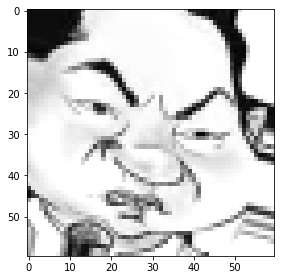

In [1549]:


Array_to_Image(org_train,44,1)





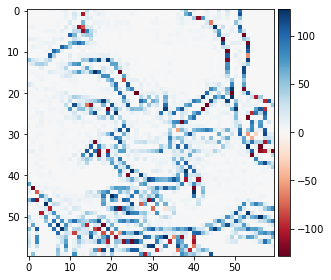

In [1548]:
Array_to_Image(edge_train,44,1)

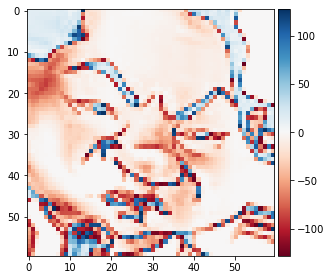

In [1550]:
Array_to_Image(skiny_train,22,1)

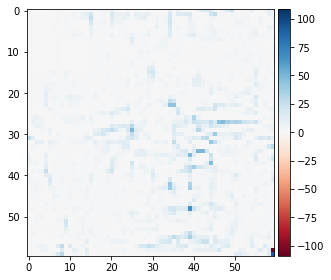

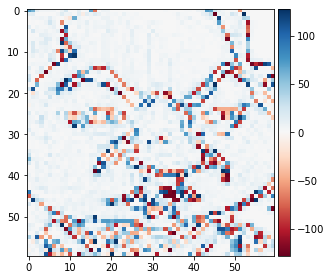

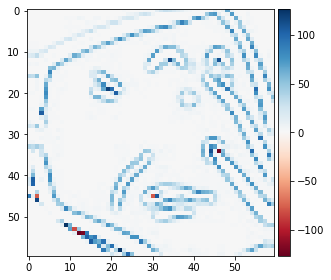

In [1319]:

#testing_images
Array_to_Image(233,0)
plt.show()
Array_to_Image(33,0)
plt.show()
Array_to_Image(293,0)

## -------------------------------------------------------------------------------

In [1210]:
Test_array_DF

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,-68,-70,-70,-70,-68,-67,-65,-65,-71,-86,...,-70,-75,-58,-45,-39,-45,-50,-54,-60,-70
1,-65,-93,-107,-102,-106,-111,-100,-99,-108,-122,...,-78,-95,-122,-125,87,72,-63,-7,-3,-2
2,-108,-73,-112,-102,-104,-111,-103,-99,-105,-121,...,-121,126,72,-101,-14,-3,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-4,-3,...,-8,-4,-3,-2,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-4,-3,-3,-3,-4,-4,-11,-7,-16,-16,...,-67,-101,-88,-62,-83,-105,101,-108,-108,-114
78,-124,-120,-119,-123,-123,-121,-101,-107,-107,-112,...,118,109,-92,-67,-74,-92,-105,-115,-128,120
79,-2,-2,-2,-3,-2,-2,-2,-2,-2,-1,...,-123,53,-119,-86,-85,-103,-125,88,60,52
80,-34,-31,-30,-29,-27,-26,-32,-23,-92,73,...,19,-66,-79,-98,-109,-99,-109,-117,121,119


In [1212]:
Train_array_DF

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,Target
0,16,14,11,13,29,46,49,42,34,24,...,32,43,54,47,46,83,90,110,-126,Angry
1,42,44,45,47,48,50,51,52,53,53,...,49,28,26,32,31,28,29,30,30,Angry
2,-114,-116,-118,-118,-105,-96,-96,-98,-99,-101,...,-108,51,2,1,3,125,-29,-26,-25,Angry
3,123,126,-122,-113,-111,-113,-115,-116,-115,-116,...,-60,-56,-51,-53,-63,-59,-62,-63,-61,Angry
4,-38,-34,-34,-34,-44,-104,-46,-10,-10,-10,...,64,55,54,60,73,67,54,62,107,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,76,77,62,38,47,66,67,59,78,87,...,-1,-1,-1,-1,-3,-4,-7,-8,-10,Sad
402,0,0,0,0,1,9,28,60,70,71,...,32,72,72,83,90,82,56,48,52,Sad
403,-1,-1,-1,-1,-1,-1,-1,-1,-1,-3,...,-17,-39,-39,-36,-23,-12,-5,-2,-1,Sad
404,-4,-11,-26,-45,-45,-44,-29,-41,-54,-31,...,-47,-52,-63,-22,-43,-2,-4,-13,-34,Sad


In [1121]:
#saving original images black and white
# Train_array_DF.to_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\original_train.csv")
# Test_array_DF.to_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\original_test.csv")

In [1213]:
# ##saving skinny image
# Train_array_DF.to_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\skiny_train.csv")
# Test_array_DF.to_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\skiny_test.csv")


In [1320]:
#saving edge image
# Train_array_DF.to_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\edge_train.csv")
# Test_array_DF.to_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\edge_test.csv")


# CREATING MODEL

In [1232]:
org_train=pd.read_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\original_train.csv")

In [1233]:
org_test=pd.read_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\original_test.csv")

In [1322]:
edge_train=pd.read_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\edge_train.csv")

In [1323]:
edge_test=pd.read_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\edge_test.csv")

In [1236]:
skiny_train=pd.read_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\skiny_train.csv")

In [1237]:
skiny_test=pd.read_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\skiny_test.csv")

In [1431]:
org_train["Target"]=org_train["Target"].replace({"Angry":1,"Happy":2,"Neutral":3,"Sad":4})
edge_train["Target"]=org_train["Target"].replace({"Angry":1,"Happy":2,"Neutral":3,"Sad":4})
skiny_train["Target"]=org_train["Target"].replace({"Angry":1,"Happy":2,"Neutral":3,"Sad":4})

#as data is freshly created it has not null values nor duplicates

## DATA EXPLORATION

In [1336]:
# analysing training data
def count_plot():
    sns.countplot(org_train["Target"])
    plt.title("Training_DATA_BLACK & WHITE")
    plt.show()
    sns.countplot(edge_train["Target"])
    plt.title("EDGED IMAGES")
    plt.show()
    sns.countplot(skiny_train["Target"])
    plt.title("SKINNY")
    plt.show()

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


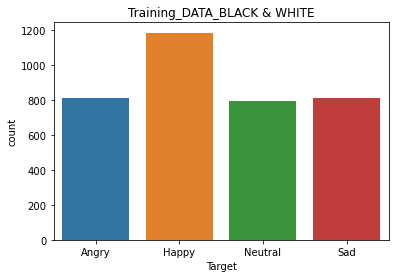

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


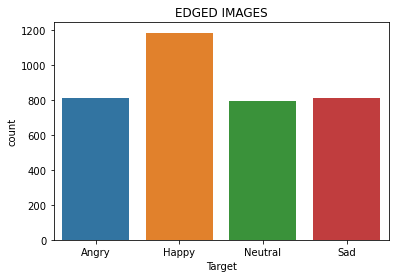

C:\Users\vipul ghadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


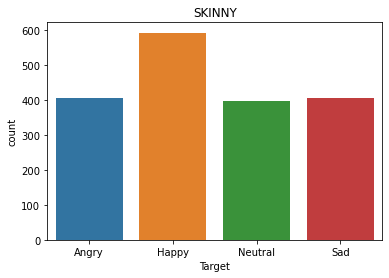

In [1337]:
count_plot()

In [1339]:
# similar graph for three types of image data

In [1433]:
def logistic(a):
    
    X_train,X_test,y_train,y_test=train_test_split(a.iloc[:,:-1],a.iloc[:,-1],test_size=.3)
    lr=LogisticRegression(class_weight="balanced",)
    lr.fit(X_train,y_train)
    aa=lr.predict(X_test)
    print(accuracy_score(y_test,aa))

   
   
    

In [1344]:
logistic(edge_train)

0.3844731977818854


C:\Users\vipul ghadi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1554]:
def random_(a):
    
    X_train,X_test,y_train,y_test=train_test_split(a.iloc[:,:-1],a.iloc[:,-1],test_size=.3,shuffle=True,random_state=34)

    forest=RandomForestClassifier(n_jobs=-1,max_depth=6)
    model_=forest.fit(X_train,y_train)
    aa=forest.predict(X_test)
    test=((confusion_matrix(y_test,aa)))
    train=((confusion_matrix(y_train,forest.predict(X_train))))
    return train,test
        
        
   



In [1527]:
### logistic regressions performance is not good for model so i tried Random forest

In [1555]:
aa=random_(org_train)

In [1556]:
aa

(array([[438, 132,   6,   7],
        [  1, 815,   5,  14],
        [ 12, 288, 222,  33],
        [  3, 106,   1, 441]], dtype=int64),
 array([[100,  95,   7,  29],
        [ 16, 299,   6,  30],
        [ 13, 178,  27,  21],
        [ 30,  88,   9, 134]], dtype=int64))

In [1557]:
def plotting_matrix(a):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = a[0], display_labels = ["angry","happy","neutral","sad"])

    cm_display.plot()
    plt.title("Confusion matrix for black (train)")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = a[1], display_labels = ["angry","happy","neutral","sad"])

    cm_display.plot()
    plt.title("Confusion matrix for black (test)")



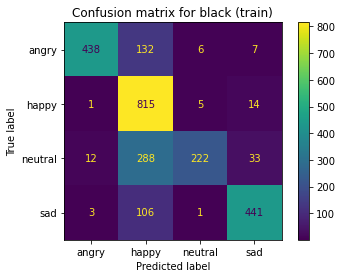

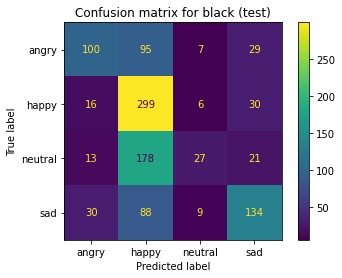

In [1559]:
plotting_matrix(aa)

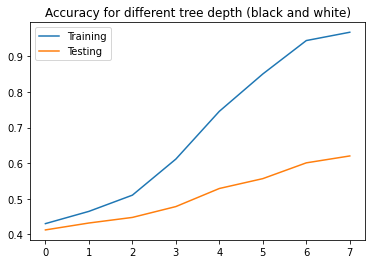

In [1397]:

plt.plot(a[0], label="Training")
plt.plot(a[1], label="Testing")
plt.title("Accuracy for different tree depth (black and white)")
plt.legend()

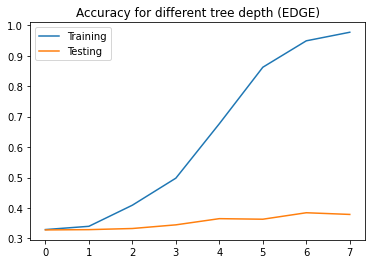

In [1400]:
plt.plot(a[0], label="Training")
plt.plot(a[1], label="Testing")
plt.title("Accuracy for different tree depth (EDGE)")
plt.legend()
        
   

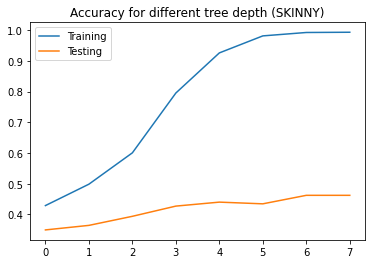

In [1402]:
plt.plot(a[0], label="Training")
plt.plot(a[1], label="Testing")
plt.title("Accuracy for different tree depth (SKINNY)")
plt.legend()


In [1528]:
## AS PER GRAPHS EDGE MODEL,SKINNY MODEL NOT PERFORM WELL

## final model base on black and white model

In [1495]:
def final(a):
    
        X_train,X_test,y_train,y_test=train_test_split(a.iloc[:,:-1],a.iloc[:,-1],test_size=.3)

        forest=RandomForestClassifier(n_jobs=-1,max_depth=6)
        model_=forest.fit(X_train,y_train)
        aa=forest.predict(org_test)
        return aa

In [1520]:
final_answer=final(org_train)

In [1521]:
submit=pd.DataFrame({"Labels":final_answer})

In [1503]:
len(final_answer)

369

In [1524]:
submit["Labels"]=submit["Labels"].replace({1:"Angry",2:"Happy",3:"Neutral",4:"Sad"})

In [1526]:
submit.to_csv(r"C:\Users\vipul ghadi\Desktop\brain_dead\brain_dead_emotion_detection\final_submit.csv")